## 3 digits - Merging year and country wise

### Waves 4,5,6

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/data_clean_w456.csv"
)
indexes = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/work_quality_indexes_year_country.csv"
)

In [3]:
def convert_to_3_digits(number):
    return int(str(number)[:-1]) if number >= 1000 else number


df["isco"] = df["isco"].apply(lambda x: convert_to_3_digits(x))
indexes["isco"] = indexes["isco"].apply(lambda x: convert_to_3_digits(x))

In [4]:
df = df.merge(indexes, on=["year", "country", "isco"], how="inner")

In [5]:
df

,mergeid,wave,year,age,nb_children,partnerinhh,job_status,eurod,eurodcat,country,...,jqi_intensity,jqi_prospects,jqi_working_time_quality,jqi_monthly_earnings_weighted,jqi_skills_discretion_weighted,jqi_social_environment_weighted,jqi_physical_environment_weighted,jqi_intensity_weighted,jqi_prospects_weighted,jqi_working_time_quality_weighted
0,AT-009376-01,4,2011,53.0,2.0,1,Civil servant,0.0,0,Austria,...,42.441860,37.500000,99.375000,2255.757532,99.866122,107.927235,125.510628,54.767774,54.304747,142.426610
1,AT-036427-02,4,2011,54.0,2.0,1,Self-employed,0.0,0,Austria,...,42.441860,37.500000,99.375000,2255.757532,99.866122,107.927235,125.510628,54.767774,54.304747,142.426610
2,AT-011070-01,4,2011,59.0,2.0,1,Civil servant,2.0,0,Austria,...,60.465116,29.687500,82.291667,2018.544145,80.457574,79.867051,97.823588,64.575931,31.119540,86.453532
3,AT-326780-02,4,2011,57.0,2.0,1,Civil servant,5.0,1,Austria,...,60.465116,29.687500,82.291667,2018.544145,80.457574,79.867051,97.823588,64.575931,31.119540,86.453532
4,AT-413796-01,4,2011,55.0,1.0,1,Civil servant,2.0,0,Austria,...,60.465116,29.687500,82.291667,2018.544145,80.457574,79.867051,97.823588,64.575931,31.119540,86.453532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20297,SI-945439-01,6,2015,60.0,0.0,1,Private sector employee,0.0,0,Slovenia,...,60.465116,12.500000,96.875000,870.142627,52.528371,68.939004,63.859428,41.073687,8.594993,67.130822
20298,SI-945439-01,6,2015,60.0,0.0,1,Private sector employee,0.0,0,Slovenia,...,51.162791,50.000000,56.750000,3266.650022,117.966099,148.941248,149.266272,104.263986,69.717175,103.583647
20299,SI-966058-01,6,2015,57.0,2.0,0,Public sector employee,4.0,1,Slovenia,...,53.488372,41.666667,76.708333,662.646287,36.340236,60.451077,48.139088,21.415786,32.360754,53.498362
20300,SI-966058-01,6,2015,57.0,2.0,0,Public sector employee,4.0,1,Slovenia,...,63.565891,42.857143,89.389706,659.185057,43.628426,68.433711,61.778573,39.993333,35.662705,63.517250


In [6]:
df.mergeid.nunique()

5837

In [7]:
df.groupby("country").mergeid.nunique()

country
Austria           322
Belgium           816
Czech Republic    414
Denmark           472
Estonia           710
France            417
Germany           739
Italy             542
Slovenia          364
Spain             712
Switzerland       329
Name: mergeid, dtype: int64

In [8]:
df.groupby("year").mergeid.nunique()

year
2011    2778
2013    3381
2015    3882
Name: mergeid, dtype: int64

In [9]:
df.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w456_year_country.csv",
    index=False,
)

### Some descriptive stats

In [10]:
round(df[["age", "gender", "nb_children", "yrseducation"]].describe(), 2)

,age,gender,nb_children,yrseducation
count,20302.00,20302.00,20302.00,20302.00
mean,56.41,0.53,1.78,13.02
std,3.16,0.50,1.26,4.26
min,50.00,0.00,0.00,0.00
25%,54.00,0.00,1.00,11.00
50%,56.00,1.00,2.00,13.00
75%,59.00,1.00,2.00,16.00
max,65.00,1.00,10.00,39.00


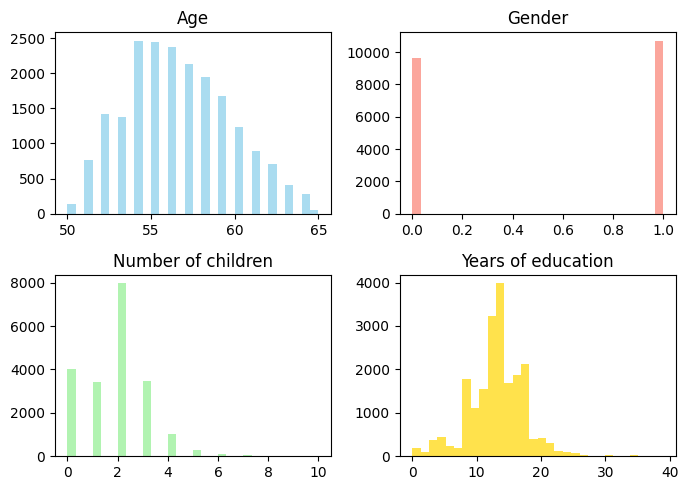

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["age"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Age")

axs[0, 1].hist(df["gender"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Gender")

axs[1, 0].hist(df["nb_children"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Number of children")

axs[1, 1].hist(df["yrseducation"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Years of education")

plt.tight_layout()

plt.show()

In [12]:
round(df["job_status"].value_counts(normalize=True), 2)

job_status
Private sector employee    0.38
Public sector employee     0.23
Employee                   0.21
Self-employed              0.13
Civil servant              0.05
Name: proportion, dtype: float64

In [13]:
round(
    df[
        ["yrscontribution", "retirement_age", "work_horizon", "work_horizon_change"]
    ].describe(),
    2,
)

,yrscontribution,retirement_age,work_horizon,work_horizon_change
count,20302.00,20302.00,20302.00,20302.00
mean,35.99,63.43,7.01,0.20
std,6.03,2.15,3.42,0.54
min,6.00,57.00,0.08,0.00
25%,33.00,62.00,4.08,0.00
50%,37.00,65.00,7.00,0.00
75%,40.00,65.00,10.00,0.08
max,55.00,68.00,17.00,4.00


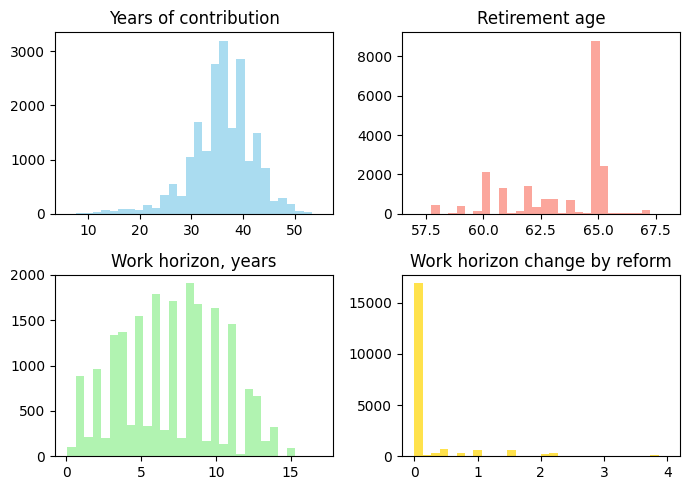

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["yrscontribution"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Years of contribution")

axs[0, 1].hist(df["retirement_age"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Retirement age")

axs[1, 0].hist(df["work_horizon"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Work horizon, years")

axs[1, 1].hist(df["work_horizon_change"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Work horizon change by reform")

plt.tight_layout()

plt.show()

In [15]:
round(df["eurodcat"].value_counts(normalize=True), 2)

eurodcat
0    0.81
1    0.19
Name: proportion, dtype: float64

In [16]:
df["eurod"].value_counts()

eurod
0.0     5293
1.0     4968
2.0     3646
3.0     2542
4.0     1693
5.0      997
6.0      573
7.0      340
8.0      131
9.0       78
10.0      33
11.0       8
Name: count, dtype: int64

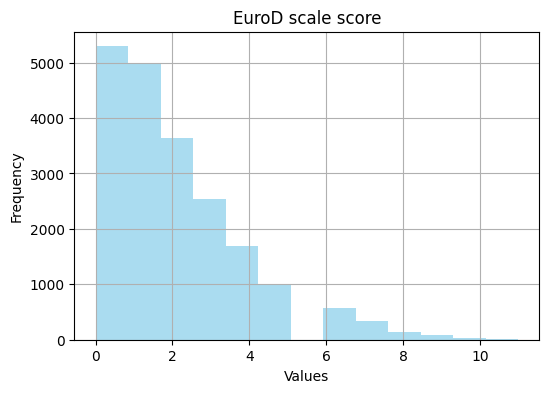

In [17]:
plt.figure(figsize=(6, 4))
plt.hist(df["eurod"], bins=13, color="skyblue", alpha=0.7)
plt.title("EuroD scale score")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [18]:
round(
    df[
        [
            "jqi_monthly_earnings",
            "jqi_skills_discretion",
            "jqi_social_environment",
            "jqi_physical_environment",
            "jqi_intensity",
            "jqi_prospects",
            "jqi_working_time_quality",
        ]
    ].describe(),
    2,
)

,jqi_monthly_earnings,jqi_skills_discretion,jqi_social_environment,jqi_physical_environment,jqi_intensity,jqi_prospects,jqi_working_time_quality
count,20302.00,20302.00,20302.00,20302.00,20302.00,20302.00,20302.00
mean,1567.45,59.80,80.35,84.44,49.56,40.54,87.21
std,707.54,15.11,8.46,10.24,9.06,14.57,11.91
min,39.50,2.33,37.50,25.64,11.63,0.00,7.25
25%,1096.89,48.23,75.00,78.97,44.19,31.25,81.43
50%,1459.73,60.22,80.68,87.44,49.61,39.84,90.46
75%,1877.15,72.13,86.15,91.95,55.04,50.00,96.35
max,12267.43,97.47,100.00,100.00,83.72,100.00,100.00


### Waves 4,5,6 common individuals

In [19]:
df.mergeid.nunique()

5837

In [20]:
unique_mergeid_w4 = set(df[df.wave == 4]["mergeid"].unique())
unique_mergeid_w5 = set(df[df.wave == 5]["mergeid"].unique())
unique_mergeid_w6 = set(df[df.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w5).intersection(
    unique_mergeid_w6
)
len(intersection_ids)

1108

In [21]:
w456_common = df[df["mergeid"].isin(intersection_ids)].reset_index(drop=True)

isco = w456_common["isco"].value_counts().to_frame().reset_index()
isco = isco[isco["count"] >= 10]
w456_common = w456_common[w456_common["isco"].isin(isco["isco"].unique())].reset_index(
    drop=True
)

In [22]:
w456_common.groupby("country").mergeid.nunique()

country
Austria            86
Belgium           226
Czech Republic     78
Denmark           122
Estonia           188
France            137
Germany            22
Italy              89
Slovenia           68
Spain              92
Name: mergeid, dtype: int64

In [23]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [24]:
w456_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w456_year_country_common.csv",
    index=False,
)

### Waves 4 and 6

In [25]:
result = (
    df[df["year"].isin([2013, 2015])]
    .groupby("mergeid")["work_horizon_change"]
    .sum()
    .reset_index()
)
result["year"] = 2015

df = df.drop(columns="work_horizon_change")
df = df.merge(result, on=["mergeid", "year"], how="left")

df["work_horizon_change"] = df["work_horizon_change"].fillna(0)

In [26]:
w46 = df[(df.wave == 4) | (df.wave == 6)].reset_index(drop=True)

In [27]:
w46.mergeid.nunique()

5274

In [28]:
w46.groupby("country").mergeid.nunique()

country
Austria           313
Belgium           735
Czech Republic    376
Denmark           430
Estonia           685
France            402
Germany           590
Italy             488
Slovenia          340
Spain             586
Switzerland       329
Name: mergeid, dtype: int64

In [29]:
w46.groupby("wave").mergeid.nunique()

wave
4    2778
6    3882
Name: mergeid, dtype: int64

In [30]:
w46.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w46_year_country.csv",
    index=False,
)

### Waves 4 and 6 common individuals

In [31]:
unique_mergeid_w4 = set(w46[w46.wave == 4]["mergeid"].unique())
unique_mergeid_w6 = set(w46[w46.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w6)
len(intersection_ids)

1386

In [32]:
w46_common = w46[w46["mergeid"].isin(intersection_ids)].reset_index(drop=True)

In [33]:
w46_common.groupby("country").mergeid.nunique()

country
Austria           115
Belgium           271
Czech Republic    109
Denmark           133
Estonia           247
France            165
Germany            28
Italy             119
Slovenia           88
Spain             111
Name: mergeid, dtype: int64

In [34]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [35]:
w46_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w46_year_country_common.csv",
    index=False,
)